# Improving the code

We want to be able to quantify the uncertainty in the model limb darkening that arises from the uncertainty in the target's temperature and surface gravity. For this we will run monte carlo simulations. However the code is currently quite slow to run, and can be optimized. There are loops that ought to be replaced by vector operations.

In [1]:
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.special as sp
import plotly.plotly as py
from plotly.graph_objs import *

from pavo_ld import V_from_claret
from pavo_ld import get_elc
from pavo_ld import read_regner
from pavo_ld import elc_interp
from pavo_ld import elc_interp_sig

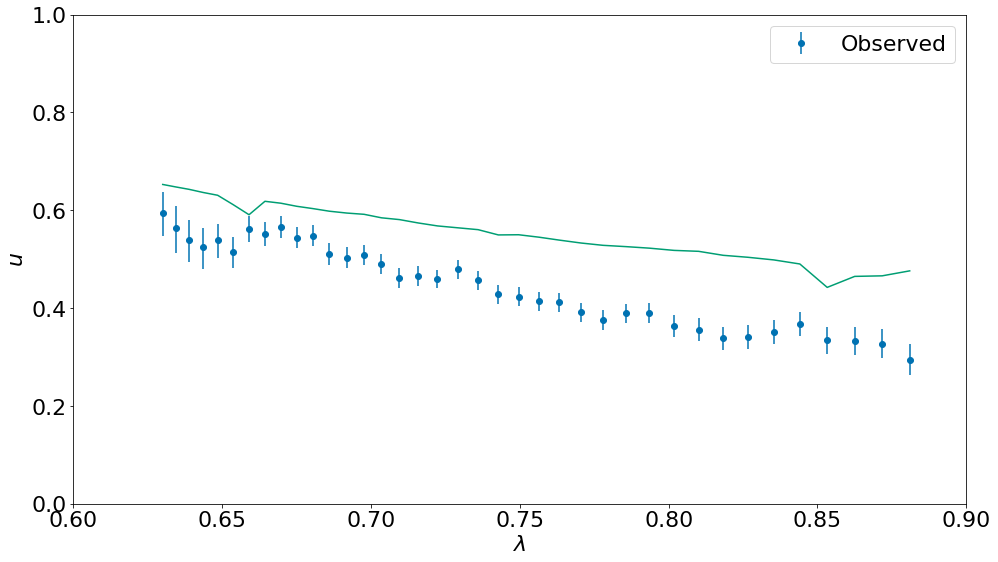

In [2]:
teff = 4960.
logg = 3.4
wls,elcs,scls,ftcs = elc_interp(teff,logg)

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size': 22,
        }

matplotlib.rc('font', **font)
sns.set_palette(sns.color_palette("colorblind"))

fig = plt.figure(figsize=(16,9))

lam=[]
ld=[]
ldhi=[]
ldlo=[]
with open('etaCep_wlld.dat','r') as f:
    for line in f:
        line = line.strip()
        columns = line.split()
        lam.append(float(columns[0]))
        ld.append(float(columns[1]))
        ldhi.append(float(columns[2]))
        ldlo.append(float(columns[3]))
        
plt.errorbar(lam,ld, yerr = [ldlo, ldhi], fmt='o', label='Observed')

plt.plot(wls,elcs,'-')
plt.xlim([0.6,0.9])
plt.ylim([0,1])
plt.xlabel('$\lambda$', fontdict=font)
plt.ylabel('$u$', fontdict=font)

plt.legend()

plt.show()

In [5]:
sigteff = 50.
siglogg = 0.1

#Determine the coefficients with uncertainties from an MC simulation with 1000 steps
wls,melcs,sigelcs,mscls,sigscls,mftcs,sigftcs = elc_interp_sig(teff,sigteff,logg,siglogg,1000)



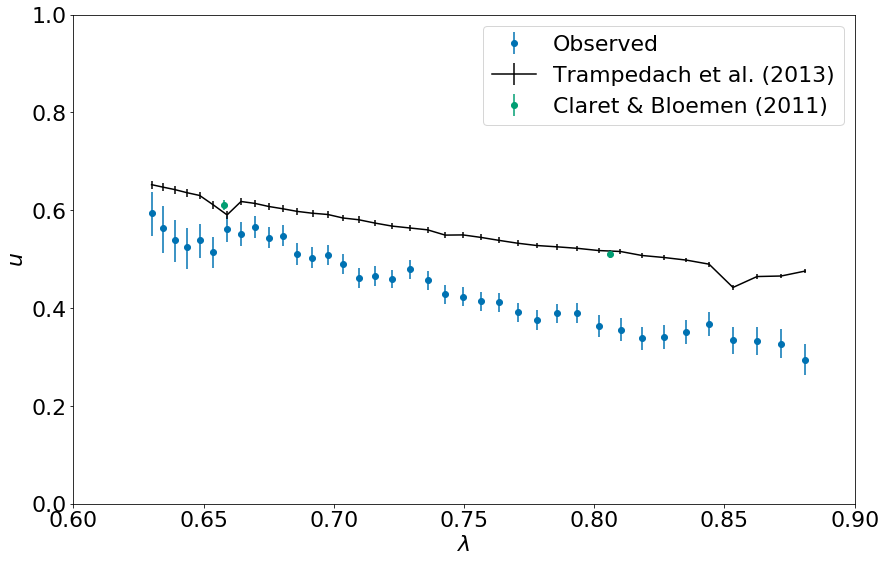

In [11]:
fig = plt.figure(figsize=(14,9))

lam=[]
ld=[]
ldhi=[]
ldlo=[]
with open('etaCep_wlld.dat','r') as f:
    for line in f:
        line = line.strip()
        columns = line.split()
        lam.append(float(columns[0]))
        ld.append(float(columns[1]))
        ldhi.append(float(columns[2]))
        ldlo.append(float(columns[3]))
        
plt.errorbar(lam,ld, yerr = [ldlo, ldhi], fmt='o', label='Observed')
plt.errorbar(wls,melcs, yerr = sigelcs, fmt='k', label='Trampedach et al. (2013)')
plt.errorbar([0.658, 0.806],[0.611, 0.511], yerr = [0.010, 0.008], fmt='o', label='Claret & Bloemen (2011)')

#plt.plot(wls,elcs,'-')
plt.xlim([0.6,0.9])
plt.ylim([0,1])
plt.xlabel('$\lambda$', fontdict=font)
plt.ylabel('$u$', fontdict=font)

plt.legend()

plt.show()